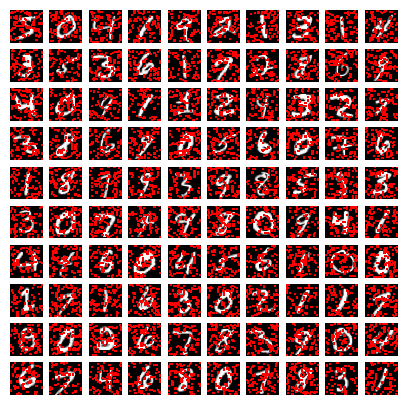

In [1]:
import os, sys
directory_path = os.path.dirname(os.path.abspath("__notebook__"))
sys.path.append('../../')
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
from models import rbm
from torchvision import datasets
from sklearn.preprocessing import StandardScaler

def add_random_nans(data, nan_probability):
    nan_mask = np.random.rand(*data.shape) < nan_probability
    data[nan_mask] = np.nan
    return data

train_dataset = datasets.MNIST(root='./data', train=True, download=True)
scaler = StandardScaler()
X = train_dataset.data.numpy()
n_examples = X.shape[0]
X = X.reshape(n_examples, -1)
X = scaler.fit_transform(X)
X = add_random_nans(X, 0.1)
y = train_dataset.targets.numpy()

fig, axes = plt.subplots(10, 10, figsize=(5, 5))
axes = axes.flatten()
for i in range(100):
    cmap = plt.cm.gray
    cmap.set_bad(color='red')
    axes[i].imshow(scaler.inverse_transform(X[i].reshape(1, -1))\
                   .reshape(28, 28), cmap=cmap)
    axes[i].axis('off')
plt.show()

In [2]:
model = rbm.RBM(
    n_vis=784,
    n_hid=200
)
stats = model.fit_autograd(
    X=X[:10000],
    n_gibbs=1,
    lr=0.001,
    n_epochs=50,
    batch_size=10,
    gamma=1,
    gamma_delay=50,
    rng_seed=0,
    verbose_interval=2,
    checkpoint_path=f'{directory_path}/rbm_checkpoints/rbm_mnist_missing_demo.pth'
)

epoch: 00 of 50 | loss: 2.388 | recon_mse: 0.413 | kl_data_model: 297.48 | kl_model_data: -241.656
W: tensor([[ 0.0902,  0.0453,  0.0248,  ..., -0.0079,  0.0603,  0.0524],
        [ 0.0436,  0.0520,  0.0139,  ..., -0.0024,  0.0339,  0.0261],
        [ 0.0454,  0.0040, -0.0133,  ...,  0.0215, -0.0004, -0.0013],
        ...,
        [-0.0275, -0.0368,  0.0318,  ..., -0.0124, -0.0445, -0.0060],
        [ 0.0184,  0.0116, -0.0009,  ...,  0.0006,  0.0300,  0.0046],
        [ 0.0224,  0.0252, -0.0095,  ..., -0.0230, -0.0141, -0.0520]])mu: tensor([ 6.8575e-02,  3.8903e-02,  3.0345e-02,  5.7243e-02, -5.1676e-02,
        -1.5651e-01, -7.2972e-02,  5.8721e-02,  3.5634e-02, -8.5989e-02,
        -9.9716e-02, -1.6648e-01, -4.0703e-02, -4.5237e-02, -6.6855e-03,
         1.6164e-01, -4.3639e-02, -1.9312e-02,  7.1023e-02, -4.6770e-02,
         1.7193e-02,  4.6338e-02, -5.2833e-02,  5.8807e-03,  7.0504e-02,
        -7.6792e-02,  5.2552e-02, -4.4718e-02,  1.9769e-01, -5.0243e-02,
         2.6455e-02, -1

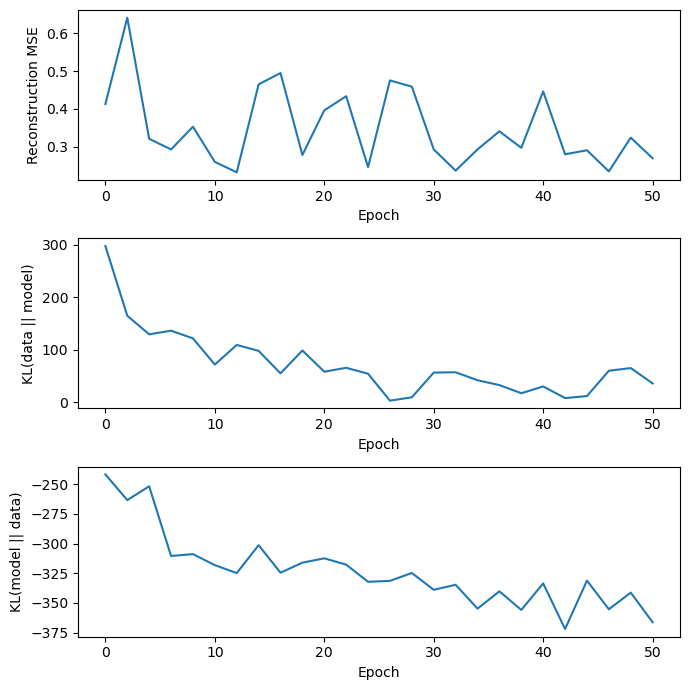

In [3]:
def visualize_learning(stats):
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(7, 7))
    axs[0].plot(stats['epoch_num'], stats['recon_mse'])
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Reconstruction MSE')
    axs[1].plot(stats['epoch_num'], stats['kl_data_model'])
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('KL(data || model)')
    axs[2].plot(stats['epoch_num'], stats['kl_model_data'])
    axs[2].set_xlabel('Epoch')
    axs[2].set_ylabel('KL(model || data)')
    plt.tight_layout()
visualize_learning(stats)

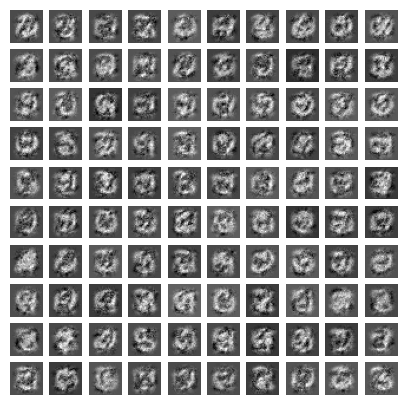

In [5]:
model = rbm.load(f'{directory_path}/rbm_checkpoints/rbm_mnist_missing_demo.pth')
samples = model.reconstruct(np.zeros((100, 784)), n_gibbs=200)
fig, axes = plt.subplots(10, 10, figsize=(5, 5))
axes = axes.flatten()
for i in range(100):
    axes[i].imshow(scaler.inverse_transform(samples[i].reshape(1, -1))\
                   .reshape(28, 28), cmap='gray')
    axes[i].axis('off')
plt.show()